**Week09 Keras CNN Implementations Lab**


Reference: Textbook notebook for chapter 14

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


A couple utility functions to plot grayscale and RGB images:

# Tackling Fashion MNIST With a CNN

### Loading and Processing Data

In [ ]:
# Data Preprocessing Version 1
# (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# X_mean = X_train.mean(axis=0, keepdims=True)
# X_std = X_train.std(axis=0, keepdims=True) + 1e-7
# X_train = (X_train - X_mean) / X_std
# X_valid = (X_valid - X_mean) / X_std
# X_test = (X_test - X_mean) / X_std

# X_train = X_train[..., np.newaxis]
# X_valid = X_valid[..., np.newaxis]
# X_test = X_test[..., np.newaxis]

In [ ]:
# Data Preprocessing Version 2
# import tensorflow as tf
# from tensorflow import keras

# #Loading the dataset
# fashion_mnist = keras.datasets.fashion_mnist
# (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# # splitting the full training set into a validation set and a (smaller) training set
# # scaling the pixel intensities down to the 0-1 range
# # and converting them to floats, by dividing by 255
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# X_test = X_test / 255.

# X_train = X_train[..., np.newaxis]
# X_valid = X_valid[..., np.newaxis]
# X_test = X_test[..., np.newaxis]

In [ ]:
# Data Preprocessing Version 3
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full.reshape(-1, X_train_full.shape[-1])).reshape(X_train_full.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

## Model #1

- maxpooling
- zero padding

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[ 28, 28, 1], padding="SAME", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1719/1719 [==============================] - 23s 8ms/step - loss: 1.8361 - accuracy: 0.4197 - val_loss: 0.8958 - val_accuracy: 0.6928
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8079 - accuracy: 0.7147 - val_loss: 0.6899 - val_accuracy: 0.7590
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6810 - accuracy: 0.7571 - val_loss: 0.6347 - val_accuracy: 0.7652
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6115 - accuracy: 0.7783 - val_loss: 0.5615 - val_accuracy: 0.8118
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5576 - accuracy: 0.7979 - val_loss: 0.5155 - val_accuracy: 0.8146
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5143 - accuracy: 0.8113 - val_loss: 0.4723 - val_accuracy: 0.8294
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4799 - accuracy: 0.8254 - val_loss: 0.4398 - val_ac

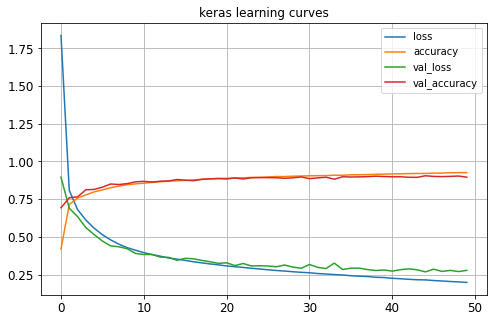

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title("keras learning curves")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3075 - accuracy: 0.8893


[0.3074536621570587, 0.8892999887466431]

## Model #2

- no maxpooling
- zero padding

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[ 28, 28, 1], padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="SAME", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
1719/1719 [==============================] - 55s 31ms/step - loss: 1.0357 - accuracy: 0.6737 - val_loss: 0.5720 - val_accuracy: 0.7964
Epoch 2/50
1719/1719 [==============================] - 53s 31ms/step - loss: 0.5237 - accuracy: 0.8113 - val_loss: 0.4793 - val_accuracy: 0.8244
Epoch 3/50
1719/1719 [==============================] - 53s 31ms/step - loss: 0.4444 - accuracy: 0.8402 - val_loss: 0.4005 - val_accuracy: 0.8612
Epoch 4/50
1719/1719 [==============================] - 53s 31ms/step - loss: 0.4024 - accuracy: 0.8561 - val_loss: 0.3768 - val_accuracy: 0.8698
Epoch 5/50
1719/1719 [==============================] - 54s 31ms/step - loss: 0.3772 - accuracy: 0.8641 - val_loss: 0.3576 - val_accuracy: 0.8754
Epoch 6/50
1719/1719 [==============================] - 54s 31ms/step - loss: 0.3577 - accuracy: 0.8704 - val_loss: 0.3619 - val_accuracy: 0.8738
Epoch 7/50
1719/1719 [==============================] - 53s 31ms/step - loss: 0.3453 - accuracy: 0.8754 - val_loss: 0.3369 -

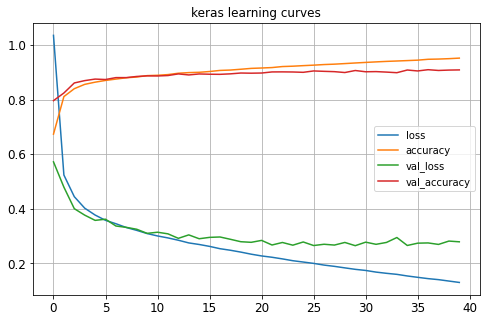

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title("keras learning curves")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3133 - accuracy: 0.8971


[0.3133382201194763, 0.8970999717712402]